In [53]:
import numpy as np

from train import *
from stable_baselines3 import PPO
from pyqula.topology import berry_phase
from dataclasses import dataclass
import pickle
from shutil import copyfile
from IPython.display import clear_output
import matplotlib.pyplot as plt

time_limit = 10

figure_width = 0.9

text_width = 5.59164
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family" : "serif",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": (figure_width * text_width, figure_width * text_width * 0.75),
    "figure.autolayout": True,
})

@dataclass
class State:
    dos: np.ndarray
    gap: float
    invariant: float
    
def save(obj, path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)
        
def load(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def make_state(env: "OneDimEnv | ZeemanEnv") -> State:
    obs = env.get_obs()
    gap = env.get_gap()
    invariant = env.get_invariant()
    return State(obs, gap, invariant)

def normalize(array: np.ndarray) -> np.ndarray:
    return array / np.max(array)

skip_calculation = True

In [54]:
if not skip_calculation:
    states = []
    
    env = make_1d(n=2)()
    model = PPO.load(f"../saves/moire/moire_retrain_005noise.zip", device="cpu")
    
    obs, _ = env.reset()
    states.append(make_state(env))
    
    for _ in range(time_limit):
        action, _ = model.predict(obs, deterministic=False)
        obs, reward, terminated, truncated, info = env.step(action)
        states.append(make_state(env))
        if terminated or truncated:
            break
    print(f"Time steps: {len(states)}")
    print(f"Gap: {states[-1].gap:.2f}")
    print(f"Invariant: {states[-1].invariant / np.pi:.0f} π")
    save(states, "moire/moire_dos.pkl")
else:
    states = load("moire/moire_dos.pkl")
    print(f"Time steps: {len(states)}")
    print(f"Gap: {states[-1].gap:.2f}")
    print(f"Invariant: {states[-1].invariant / np.pi:.0f} π")

Time steps: 4
Gap: 0.15
Invariant: 1 π


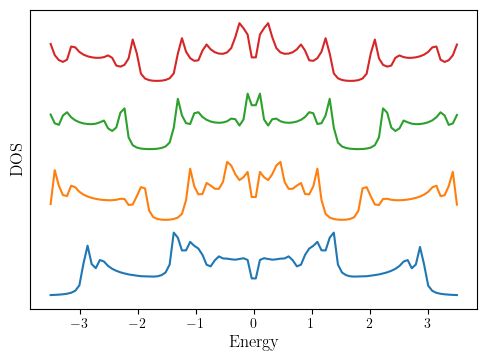

In [55]:
x = np.linspace(-3.5, 3.5, 100)
y_offset = 0.0
for i, state in enumerate(states):
    obs = state.dos + y_offset
    plt.plot(x, obs, label=f"$t = {i}$")
    y_offset += state.dos.max() - states[(i + 1) % len(states)].dos.min() + 0.5

# plt.legend()
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.yticks([])
plt.savefig("moire/Moire DOS.pdf")
plt.show()

In [56]:
if not skip_calculation:
    states = []
    
    env = make_zeeman()()
    model = PPO.load(f"../saves/zeeman/zeeman_deep_005noise.zip", device="cpu")
    clear_output(wait=True)
    
    obs, _ = env.reset()
    states.append(make_state(env))
    
    for _ in range(time_limit):
        action, _ = model.predict(obs, deterministic=False)
        obs, reward, terminated, truncated, info = env.step(action)
        states.append(make_state(env))
        if terminated or truncated:
            break
    print(f"Time steps: {len(states)}")
    print(f"Gap: {states[-1].gap:.2f}")
    print(f"Invariant: {states[-1].invariant:.0f}")
    save(states, "zeeman/zeeman_dos.pkl")
else:
    states = load("zeeman/zeeman_dos.pkl")
    print(f"Time steps: {len(states)}")
    print(f"Gap: {states[-1].gap:.2f}")
    print(f"Invariant: {states[-1].invariant:.0f}")

Time steps: 4
Gap: 1.82
Invariant: 2


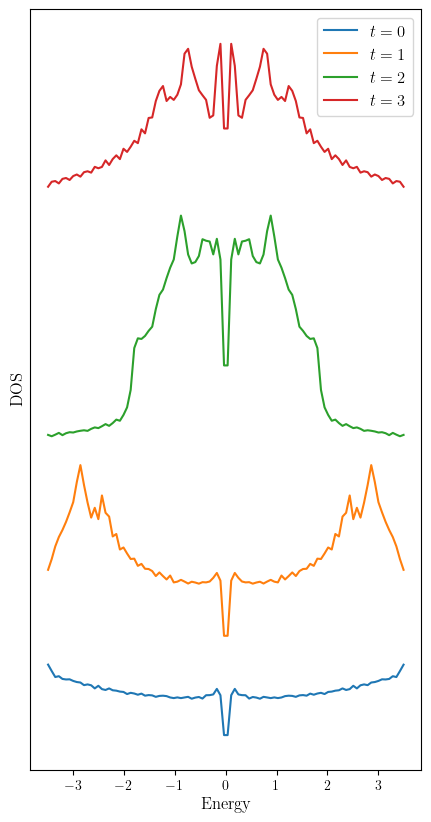

In [57]:
plt.figure(figsize=(text_width * 0.8, text_width * 1.5))
x = np.linspace(-3.5, 3.5, 100)
y_offset = 0.0
for i, state in enumerate(states):
    obs = state.dos + y_offset
    plt.plot(x, obs, label=f"$t = {i}$")
    y_offset += state.dos.max() - states[(i + 1) % len(states)].dos.min() + 0.1

plt.legend()
plt.xlabel("Energy")
plt.ylabel("DOS")
plt.yticks([])
plt.savefig("zeeman/Zeeman DOS.pdf")
plt.show()

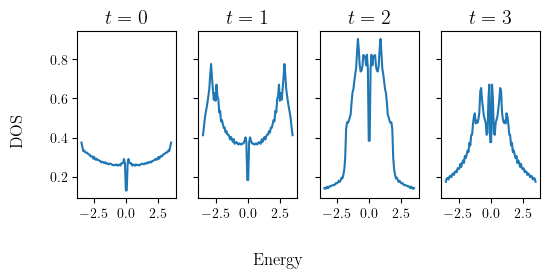

In [58]:
x = np.linspace(-3.5, 3.5, 100)
fig, axs = plt.subplots(1, len(states), sharey="all", figsize=(text_width, text_width * 0.5))
for i, state in enumerate(states):
    obs = state.dos
    axs[i].plot(x, obs)
    axs[i].set_title(f"$t = {i}$")

fig.supxlabel("Energy", fontsize=12)
fig.supylabel("DOS", fontsize=12)
fig.savefig("zeeman/Zeeman DOS horizontal.pdf")

In [59]:
if not skip_calculation:
    states = []
    
    env = make_conductance(limit_actions=True)()
    model = PPO.load(f"../saves/conductance/conductance_test_005noise.zip", device="cpu")
    clear_output(wait=True)
    
    obs, _ = env.reset()
    states.append(make_state(env))
    
    for _ in range(time_limit):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        states.append(make_state(env))
        if terminated or truncated:
            break
    print(f"Time steps: {len(states)}")
    print(f"Gap: {states[-1].gap:.2f}")
    print(f"Invariant: {states[-1].invariant / np.pi:.0f} π")
    save(states, "conductance/conductance_obs.pkl")
else:
    states = load("conductance/conductance_obs.pkl")
    print(f"Time steps: {len(states)}")
    print(f"Gap: {states[-1].gap:.2f}")
    print(f"Invariant: {states[-1].invariant / np.pi:.0f} π")

Time steps: 4
Gap: 0.26
Invariant: 1 π


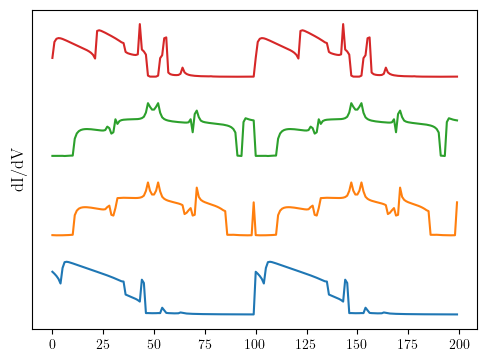

In [60]:
y_offset = 0.0
for i, state in enumerate(states):
    obs = state.dos + y_offset
    plt.plot(obs, label=f"$t = {i}$")
    y_offset += state.dos.max() - states[(i + 1) % len(states)].dos.min() + 0.5

# plt.legend()
plt.ylabel("dI/dV")
plt.yticks([])
plt.savefig("conductance/conductance obs.pdf")
plt.show()